## Load libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read and first analysis of the data

In [3]:
df = pd.read_csv("beer_reviews_raw.csv")
df.head()

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   index               1586614 non-null  int64  
 1   brewery_id          1586614 non-null  int64  
 2   brewery_name        1586599 non-null  object 
 3   review_time         1586614 non-null  int64  
 4   review_overall      1586614 non-null  float64
 5   review_aroma        1586614 non-null  float64
 6   review_appearance   1586614 non-null  float64
 7   review_profilename  1586266 non-null  object 
 8   beer_style          1586614 non-null  object 
 9   review_palate       1586614 non-null  float64
 10  review_taste        1586614 non-null  float64
 11  beer_name           1586614 non-null  object 
 12  beer_abv            1518829 non-null  float64
 13  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 169.5+ MB


In [5]:
df.describe()

,index,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,7.933065e+05,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,4.580162e+05,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,0.000000e+00,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,3.966532e+05,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,7.933065e+05,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,1.189960e+06,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,1.586613e+06,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


### Cleaning Text and Removing Special Characters

Looking at the colimn names everything seem in order they applied the snake style. The other columns don't seem to highlight any typos or special characters to take care of except for the date column and the beer_beerIds that are different from beer_name.

The date column should converted from uniques times into readable dates time

In [6]:
df['review_time'] = pd.to_datetime(df['review_time'],unit='s')

In [7]:
df.head(2)

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213


### Check out the duplicates in the ID column

In [8]:
before = len(df)
df = df.drop_duplicates()
after = len(df)
print('Number of duplicate records dropped: ', str(before - after))

Number of duplicate records dropped:  0


In [9]:
sum(df['brewery_id'].value_counts()>1)

5161

In [10]:
sum(df['beer_name'].value_counts()>1)

37949

In [11]:
sum(df['beer_beerid'].value_counts()>1)


42315

In [12]:
df[df.duplicated('beer_beerid')]

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
6,6,1075,Caldera Brewing Company,2011-10-19 02:25:15,3.5,3.5,3.5,Reidrover,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
7,7,1075,Caldera Brewing Company,2011-05-24 22:26:58,3.0,2.5,3.5,alpinebryant,Herbed / Spiced Beer,2.0,3.5,Caldera Ginger Beer,4.7,52159
8,8,1075,Caldera Brewing Company,2010-11-22 19:35:03,4.0,3.0,3.5,LordAdmNelson,Herbed / Spiced Beer,3.5,4.0,Caldera Ginger Beer,4.7,52159
9,9,1075,Caldera Brewing Company,2010-09-28 00:15:24,4.5,3.5,5.0,augustgarage,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
11,11,1075,Caldera Brewing Company,2010-08-30 07:46:05,5.0,5.0,4.0,MadeInOregon,Herbed / Spiced Beer,4.0,4.0,Caldera Ginger Beer,4.7,52159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,1586609,14359,The Defiant Brewing Company,2006-11-05 00:01:32,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,1586610,14359,The Defiant Brewing Company,2006-10-17 01:29:26,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,1586611,14359,The Defiant Brewing Company,2006-10-13 01:21:53,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,1586612,14359,The Defiant Brewing Company,2006-10-05 04:37:24,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


We realised that 'beer_beerid' refer to the 'beer_name'. However we have 37949 repetition for 'beer_name' and 42315 reprition for 'beer_beerid'. This shows that they might be a typos in writing the 'beer_name' in 4366 rows. We need to check this out.

In [13]:
beer_id_name = df[['beer_name', 'beer_beerid']]
beer_id_name_group = beer_id_name.groupby(by=['beer_name']).nunique().sort_values(by='beer_beerid', ascending=False)
beer_id_name_group
df.loc[df['beer_name'] == 'Oktoberfest']

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
1636,1636,1454,Broad Ripple Brew Pub,2011-10-04 12:35:32,4.0,4.0,3.5,JamesS,Märzen / Oktoberfest,4.5,4.0,Oktoberfest,5.50,13289
1637,1637,1454,Broad Ripple Brew Pub,2007-09-16 18:58:40,4.5,3.5,3.5,danielocean03,Märzen / Oktoberfest,4.0,3.5,Oktoberfest,5.50,13289
1638,1638,1454,Broad Ripple Brew Pub,2006-10-17 19:13:19,4.5,4.5,4.0,BlackAngus,Märzen / Oktoberfest,4.0,4.5,Oktoberfest,5.50,13289
1639,1639,1454,Broad Ripple Brew Pub,2006-10-16 00:44:31,4.5,3.5,3.5,danielocean03,Märzen / Oktoberfest,4.0,3.5,Oktoberfest,5.50,13289
1641,1641,1454,Broad Ripple Brew Pub,2006-10-12 16:08:57,5.0,3.5,4.5,RustyShackleford,Märzen / Oktoberfest,4.0,4.5,Oktoberfest,5.50,13289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562364,1562364,413,Grand Teton Brewing Co.,2009-11-17 23:15:31,4.0,4.0,3.5,Brandt,Märzen / Oktoberfest,4.0,4.0,Oktoberfest,5.80,54196
1568696,1568696,24808,Wolverine State Brewing Company,2011-09-23 22:16:56,4.0,3.0,4.0,jale,Märzen / Oktoberfest,4.0,4.0,Oktoberfest,6.25,73383
1572864,1572864,10583,Iron Springs Pub & Brewery,2009-10-13 02:55:41,4.0,4.0,4.0,mjl21,Märzen / Oktoberfest,4.0,4.0,Oktoberfest,5.00,53347
1575135,1575135,364,Maritime Pacific Brewing Company,2004-12-04 17:43:10,4.0,3.0,3.5,gentlebubbles,Märzen / Oktoberfest,3.0,3.0,Oktoberfest,NaN,21004


So we suggest that some beers have the same name but different ID because it could have different caracteristics regarding the beer_style or beer_abv. We checked this hypothesis in the table above and we relaised that the "beer_beerid" can be different for the same 'beer_name" because of the variation of "beer_abv" so the percentage of alcohol. SO we can say there is no typos in this column and data variation between id and names is totally valid

### Check for missing values and fill them if needed

In [14]:
df.isnull().sum()

index                     0
brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

__beer_abv__ : So the column with the most missing values is beer_abv. 67785 represent a low percentage compared to the total number of rows. So for now wa decide to keep these missing values. If we decide in the future to do analysis including the percentage of alcohol we exclude these rows.

__review_profilename and brewery_name__ : These two columns will be important for the futur analysis. Considering the low number of rows represented by these rows compared to the entire dataset, we decided to eliminate them from the analysis.

In [15]:
df = df.drop((df.loc[(df['review_profilename'].isnull()==True)]).index)
df = df.drop((df.loc[(df['brewery_name'].isnull()==True)]).index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586251 entries, 0 to 1586613
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   index               1586251 non-null  int64         
 1   brewery_id          1586251 non-null  int64         
 2   brewery_name        1586251 non-null  object        
 3   review_time         1586251 non-null  datetime64[ns]
 4   review_overall      1586251 non-null  float64       
 5   review_aroma        1586251 non-null  float64       
 6   review_appearance   1586251 non-null  float64       
 7   review_profilename  1586251 non-null  object        
 8   beer_style          1586251 non-null  object        
 9   review_palate       1586251 non-null  float64       
 10  review_taste        1586251 non-null  float64       
 11  beer_name           1586251 non-null  object        
 12  beer_abv            1518478 non-null  float64       
 13  beer_beerid 

we end up with 1586251 rows instead of 1586614

### Check for low variance columns and possible outliers (check ou the 0)

__check for low variance columns:__

In [16]:
low_variance = []
for col in df._get_numeric_data():
    minimum = min(df[col])
    ninety_perc = np.percentile(df[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)
print(low_variance)

[]


So there is no low variance columns

__check for outliers:__

In [17]:
outliers = pd.DataFrame(columns=df.columns)
stats = df.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 1.5
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = df[(df[col] < lower) |
                   (df[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
outliers.value_counts('Outlier')

C:\Users\Rachad\AppData\Local\Temp\ipykernel_8820\1764192289.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Rachad\AppData\Local\Temp\ipykernel_8820\1764192289.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Rachad\AppData\Local\Temp\ipykernel_8820\1764192289.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Rachad\AppData\Local\Temp\ipykernel_8820\1764192289.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(results)
C:\Users\Rachad\AppData\Local\Temp\ipykernel

Outlier
brewery_id           286255
review_aroma         192342
review_palate        181200
review_appearance    139733
review_taste          25109
review_overall        23933
beer_abv              19062
dtype: int64

In [18]:
print('reviwe_overall : ', df['review_overall'].value_counts())
print('review_aroma : ', df['review_aroma'].value_counts())
print('review_palate : ', df['review_palate'].value_counts())
print('review_appearance : ', df['review_appearance'].value_counts())
print('review_taste: ', df['review_taste'].value_counts())
print('review_overall : ', df['review_overall'].value_counts())
print('beer_abv: ', df['beer_abv'].sort_values())

reviwe_overall :  4.0    582683
4.5    324321
3.5    301743
3.0    165582
5.0     91298
2.5     58485
2.0     38206
1.5     12972
1.0     10954
0.0         7
Name: review_overall, dtype: int64
review_aroma :  4.0    557300
3.5    365239
4.5    271396
3.0    199974
2.5     66320
5.0     64095
2.0     42537
1.5     12518
1.0      6872
Name: review_aroma, dtype: int64
review_palate :  4.0    606621
3.5    338531
4.5    253052
3.0    206847
2.5     62805
5.0     62170
2.0     38315
1.5     11036
1.0      6874
Name: review_palate, dtype: int64
review_appearance :  4.0    674071
3.5    318470
4.5    288051
3.0    165926
5.0     65377
2.5     39480
2.0     25400
1.5      6146
1.0      3323
0.0         7
Name: review_appearance, dtype: int64
review_taste:  4.0    541361
4.5    336094
3.5    324479
3.0    166798
5.0     83952
2.5     66497
2.0     41961
1.5     15120
1.0      9989
Name: review_taste, dtype: int64
review_overall :  4.0    582683
4.5    324321
3.5    301743
3.0    165582
5.0     

__review_time:__ We checked the dates that are considered as outliers and they between 1996 and 2001. The mean and median of the dates are 2008 and 2009 respectively so we decide to ignore the results of the outliers and take in consideration all the dates 

In [19]:
test = outliers.loc[outliers["Outlier"] == "review_aroma"]
test["review_aroma"].value_counts()

2.5    66320
5.0    64095
2.0    42537
1.5    12518
1.0     6872
Name: review_aroma, dtype: int64

__review_aroma:__ The outliers (1.0-5) seem in the normal range of scoring from 0 to 5. So we decide to keep them in the dataset

In [20]:
test = outliers.loc[outliers["Outlier"] == "review_palate"]
test["review_palate"].value_counts()

2.5    62805
5.0    62170
2.0    38315
1.5    11036
1.0     6874
Name: review_palate, dtype: int64

__review_palate:__ The outliers (1.0-5.0) seem in the normal range of scoring from 0 to 5. So we decide to keep them in the dataset

__others:__ Same observation regarding the outliers could be applied for: review_appearance, review_taste, review_overall

In [21]:
test = outliers.loc[outliers["Outlier"] == "beer_abv"]
test["beer_abv"].value_counts()

18.00    4373
14.50    2268
15.00    1810
14.00    1741
13.50    1564
         ... 
17.35       1
57.70       1
0.08        1
30.86       1
16.10       1
Name: beer_abv, Length: 69, dtype: int64

In [22]:
test.loc[(test['beer_abv'] >= 20)]

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,Outlier
12918,12918,6513,Schorschbräu,2009-07-28 12:58:56,3.5,4.0,4.0,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 31%,30.86,51466,beer_abv
12919,12919,6513,Schorschbräu,2011-09-23 12:28:21,4.0,4.0,4.0,kappldav123,Eisbock,4.0,3.5,Schorschbräu Schorschbock 57%,57.70,73368,beer_abv
12934,12934,6513,Schorschbräu,2010-01-28 13:09:13,4.0,4.5,4.5,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 40%,39.44,55712,beer_abv
12939,12939,6513,Schorschbräu,2011-07-06 17:42:58,4.0,4.0,3.5,Sunnanek,Eisbock,4.0,4.0,Schorschbräu Schorschbock 43%,43.00,57856,beer_abv
12940,12940,6513,Schorschbräu,2010-05-21 19:23:18,3.5,4.0,4.0,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 43%,43.00,57856,beer_abv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1386403,1386403,1924,DuClaw Brewing Company,2010-02-12 06:47:04,2.5,4.0,4.0,willPS21,American Strong Ale,4.0,3.5,Colossus,21.92,48881,beer_abv
1386404,1386404,1924,DuClaw Brewing Company,2009-05-31 05:57:49,3.0,3.5,4.0,ChainGangGuy,American Strong Ale,4.0,4.0,Colossus,21.92,48881,beer_abv
1386405,1386405,1924,DuClaw Brewing Company,2009-04-05 01:11:01,3.5,3.5,4.0,BeerSox,American Strong Ale,4.0,4.0,Colossus,21.92,48881,beer_abv
1386406,1386406,1924,DuClaw Brewing Company,2009-04-03 14:29:04,4.5,4.5,4.5,beermantimmie,American Strong Ale,4.5,4.0,Colossus,21.92,48881,beer_abv


In [23]:
test['beer_abv'].max()

57.7

__beer_abv:__ The max is 57% there are 756 beers with abv over 20% but they don't seem to have different kind of reviews. These too can not be considered as real outliers 

### extract the cleaned file

In [25]:
df.to_csv("beer_review_cleaned.csv", sep = ',')

### Some quick analysis to figure out the plots we want to do

In [116]:
df[(df["beer_style"] == 'English Pale Ale')]["beer_style"].value_counts

<bound method IndexOpsMixin.value_counts of 1756       English Pale Ale
1757       English Pale Ale
1761       English Pale Ale
1762       English Pale Ale
1819       English Pale Ale
                 ...       
1586396    English Pale Ale
1586397    English Pale Ale
1586398    English Pale Ale
1586399    English Pale Ale
1586400    English Pale Ale
Name: beer_style, Length: 23376, dtype: object>

In [130]:
df["beer_style"].unique()

array(['Hefeweizen', 'English Strong Ale', 'Foreign / Export Stout',
       'German Pilsener', 'American Double / Imperial IPA',
       'Herbed / Spiced Beer', 'Light Lager', 'Oatmeal Stout',
       'American Pale Lager', 'Rauchbier', 'American Pale Ale (APA)',
       'American Porter', 'Belgian Strong Dark Ale', 'American IPA',
       'American Stout', 'Russian Imperial Stout',
       'American Amber / Red Ale', 'American Strong Ale',
       'Märzen / Oktoberfest', 'American Adjunct Lager',
       'American Blonde Ale', 'Euro Pale Lager', 'English Brown Ale',
       'Scotch Ale / Wee Heavy', 'Fruit / Vegetable Beer',
       'American Double / Imperial Stout', 'Belgian Pale Ale',
       'English Bitter', 'English Porter', 'Irish Dry Stout',
       'American Barleywine', 'Belgian Strong Pale Ale', 'Doppelbock',
       'Maibock / Helles Bock', 'Pumpkin Ale',
       'Dortmunder / Export Lager', 'Euro Strong Lager',
       'Euro Dark Lager', 'Low Alcohol Beer', 'Weizenbock',
       'Extra 

In [132]:
df["beer_style"].value_counts()

American IPA                        117566
American Double / Imperial IPA       85958
American Pale Ale (APA)              63460
Russian Imperial Stout               54120
American Double / Imperial Stout     50696
                                     ...  
Gose                                   686
Faro                                   608
Roggenbier                             466
Kvass                                  297
Happoshu                               241
Name: beer_style, Length: 104, dtype: int64

In [126]:
df.loc[(df["beer_style"] == 'English Pale Ale')].count()

index                 23376
brewery_id            23376
brewery_name          23376
review_time           23376
review_overall        23376
review_aroma          23376
review_appearance     23376
review_profilename    23376
beer_style            23376
review_palate         23376
review_taste          23376
beer_name             23376
beer_abv              22817
beer_beerid           23376
dtype: int64

In [128]:
df.loc[(df["beer_style"] == '60 Minute IPA')].count()

index                 0
brewery_id            0
brewery_name          0
review_time           0
review_overall        0
review_aroma          0
review_appearance     0
review_profilename    0
beer_style            0
review_palate         0
review_taste          0
beer_name             0
beer_abv              0
beer_beerid           0
dtype: int64

In [134]:
df["review_profilename"].value_counts().head(10)

northyorksammy    5817
BuckeyeNation     4661
mikesgroove       4617
Thorpe429         3518
womencantsail     3497
NeroFiddled       3488
ChainGangGuy      3471
brentk56          3357
Phyl21ca          3179
WesWes            3168
Name: review_profilename, dtype: int64

# PLOTS

### Matplotlib: scatter plot: for all beer present beer_abv / overall score (>=4) or overall score (<4)

In [159]:
FreqScore = df[(df["beer_abv"].isnull()!=True)]
FreqScore_over4 = FreqScore[FreqScore["review_overall"] >= 4]
FreqScore_over4
#FreqScore["review_overall"].value_counts()
good_score = FreqScore_over4.groupby("beer_abv").agg({"review_overall":"count"}).reset_index()
good_score

,beer_abv,review_overall
0,0.01,1
1,0.05,2
2,0.10,1
3,0.30,16
4,0.40,10
...,...,...
493,39.00,6
494,39.44,1
495,41.00,31
496,43.00,1


In [164]:
FreqScore = df[(df["beer_abv"].isnull()!=True)]
FreqScore_bellow4 = FreqScore[FreqScore["review_overall"] < 4]
FreqScore_bellow4
#FreqScore["review_overall"].value_counts()
bad_score = FreqScore_bellow4.groupby("beer_abv").agg({"review_overall":"count"}).reset_index()
bad_score

,beer_abv,review_overall
0,0.01,4
1,0.05,15
2,0.08,1
3,0.10,10
4,0.25,3
...,...,...
461,32.00,54
462,39.00,1
463,39.44,2
464,41.00,45


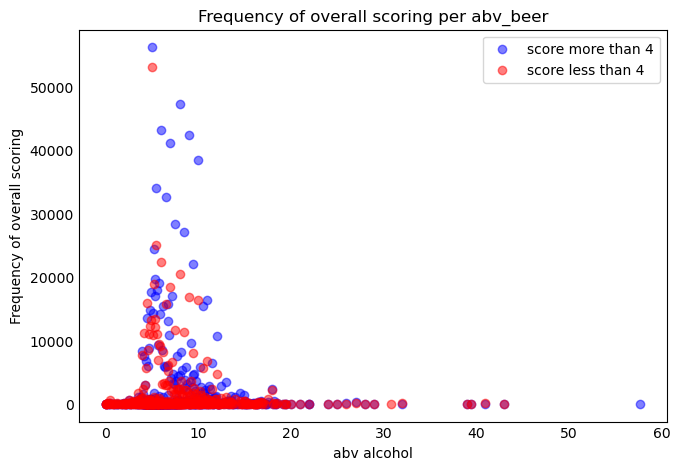

In [412]:
plt.figure(figsize=(6,4))
x = good_score["beer_abv"]
y = good_score["review_overall"]
z = bad_score["beer_abv"]
w = bad_score["review_overall"]
plt.scatter(x, y, c ="blue", alpha = 0.5, label = "score more than 4")
plt.scatter(z, w, c ="red", alpha = 0.5, label = "score less than 4")
plt.xlabel("abv alcohol")
plt.ylabel("Frequency of overall scoring")
plt.title("Frequency of overall scoring per abv_beer")
plt.legend()
plt.show()

### seaborn blot: scatter plot linear regresison: for all beer present beer_abv / overall score (>=4) or overall score (<4)

<AxesSubplot:xlabel='beer_abv', ylabel='review_overall'>

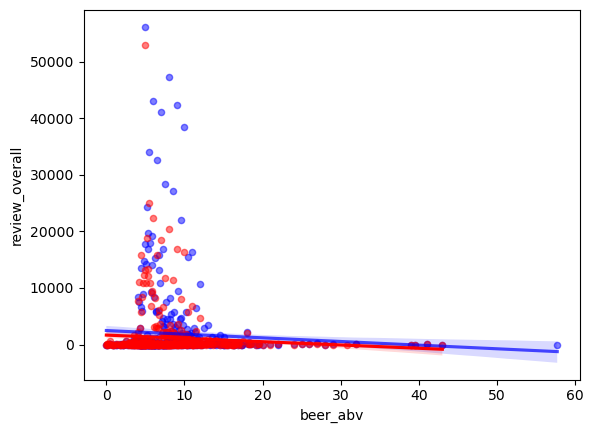

In [178]:
sns.regplot(good_score["beer_abv"],good_score["review_overall"], scatter_kws={'s':20,'alpha':0.5}, color = "blue",line_kws={'alpha':0.7})
sns.regplot(bad_score["beer_abv"],bad_score["review_overall"], color = "red",line_kws={'alpha':1}, scatter_kws={'s':20,'alpha':0.5})

### scatter plot: for English Pale Ale category : beer_abv / overall score (>=4) or overall score (<4)

In [198]:
EnglishScore = df[(df["beer_abv"].isnull()!=True) & (df["beer_style"] == "English Pale Ale")]
EnglishScore_over4 = EnglishScore[EnglishScore["review_overall"] >= 4]
good_Engscore = EnglishScore_over4.groupby("beer_abv").agg({"review_overall":"count"}).reset_index()
good_Engscore.head(1)

,beer_abv,review_overall
0,2.8,4


In [199]:
EnglishScore = df[(df["beer_abv"].isnull()!=True) & (df["beer_style"] == "English Pale Ale")]
EnglishScore_less4 = EnglishScore[EnglishScore["review_overall"] < 4]
bad_Engscore = EnglishScore_less4.groupby("beer_abv").agg({"review_overall":"count"}).reset_index()
bad_Engscore.head(1)

,beer_abv,review_overall
0,2.8,2


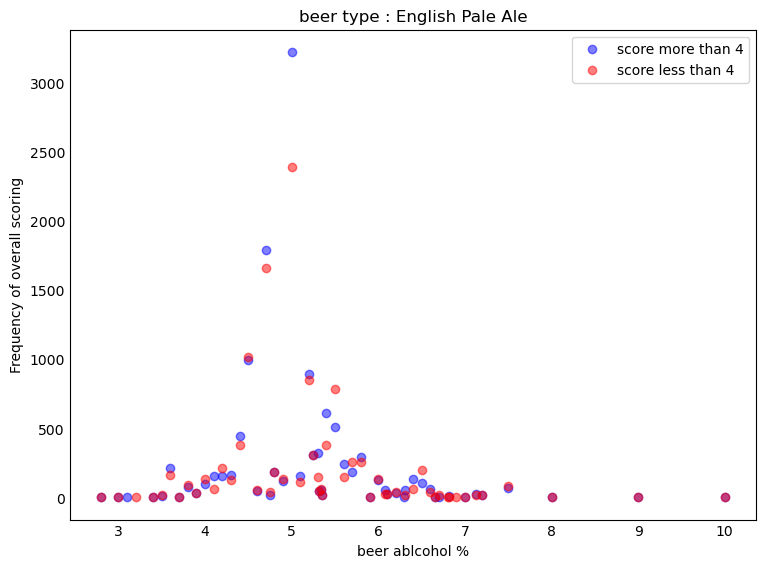

In [207]:
x = good_Engscore["beer_abv"]
y = good_Engscore["review_overall"]
z = bad_Engscore["beer_abv"]
w = bad_Engscore["review_overall"]
plt.figure(figsize=(7, 5))
plt.scatter(x, y, c ="blue", alpha = 0.5, label = "score more than 4")
plt.scatter(z, w, c ="red", alpha = 0.5, label = "score less than 4")
plt.xlabel("beer ablcohol %")
plt.ylabel("Frequency of overall scoring")
plt.title("beer type : English Pale Ale")
plt.legend()
plt.show()

### boxplot for the %abv

<AxesSubplot:title={'center':'The percentage of alcohol in all the beers of this dataset'}, xlabel='beer_abv'>

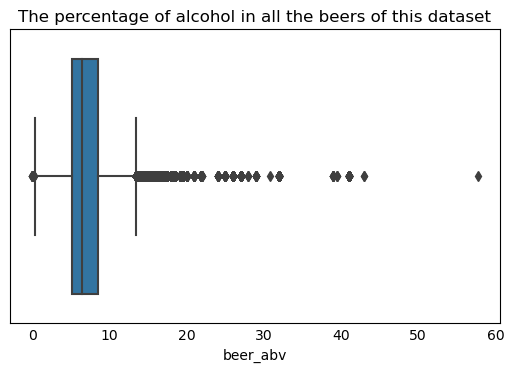

In [416]:
plt.figure(figsize=(5,3))
plt.title("The percentage of alcohol in all the beers of this dataset")
plt.xlabel("abv alcohol")
sns.boxplot(x=FreqScore["beer_abv"])

### Seaborn - violin plot: 4 cat scores to all beers 

In [225]:
scores = df[["review_aroma", "review_taste", "review_appearance", "review_palate"]]
scores

,review_aroma,review_taste,review_appearance,review_palate
0,2.0,1.5,2.5,1.5
1,2.5,3.0,3.0,3.0
2,2.5,3.0,3.0,3.0
3,3.0,3.0,3.5,2.5
4,4.5,4.5,4.0,4.0
...,...,...,...,...
1586609,4.0,4.0,3.5,4.0
1586610,5.0,4.0,2.5,2.0
1586611,3.5,4.0,3.0,3.5
1586612,4.5,4.5,4.5,4.5


<AxesSubplot:title={'center':' Compare 4 cat scores to all beers'}, ylabel='score'>

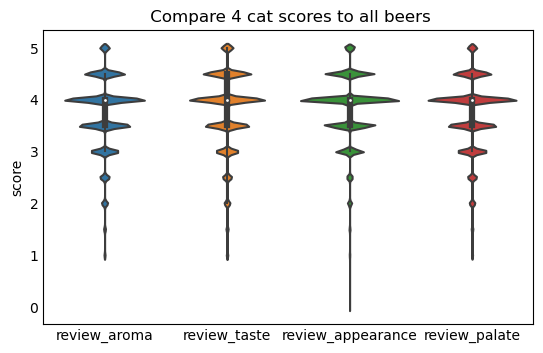

In [229]:
plt.figure(figsize=(5,3))
plt.ylabel("score")
plt.title(" Compare 4 cat scores to all beers")
sns.violinplot(data = scores)

### Matplotlib - radar: 'American IPA', 'English India Pale Ale (IPA)', 'Belgian IPA' / four various scores

In [240]:
df_select = df.loc[(df["beer_style"] == 'American IPA') | (df["beer_style"] == 'English India Pale Ale (IPA)') | (df["beer_style"] == 'Belgian IPA')]
df_select

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
257,257,1075,Caldera Brewing Company,2010-05-04 03:52:09,4.0,4.0,4.0,Akfan,American IPA,4.0,4.5,Caldera IPA,6.1,10784
265,265,1075,Caldera Brewing Company,2011-12-18 20:04:13,4.0,4.0,4.0,coldriver,American IPA,4.0,4.5,Caldera IPA,6.1,10784
330,330,1075,Caldera Brewing Company,2011-02-05 03:09:37,4.0,4.0,4.0,Mora2000,American IPA,4.0,4.0,Caldera IPA,6.1,10784
337,337,1075,Caldera Brewing Company,2011-02-08 01:40:12,4.0,4.0,4.0,Rutager,American IPA,4.0,3.5,Caldera IPA,6.1,10784
338,338,1075,Caldera Brewing Company,2011-02-07 18:58:03,4.5,4.0,4.0,CHILLINDYLAN,American IPA,4.0,4.0,Caldera IPA,6.1,10784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586564,1586564,14359,The Defiant Brewing Company,2007-02-09 00:10:28,4.0,4.0,4.5,cbl2,American IPA,4.0,4.0,India Pale Ale,6.2,35185
1586588,1586588,14359,The Defiant Brewing Company,2011-01-19 01:16:17,2.0,2.5,3.0,Buddha22,Belgian IPA,2.0,2.5,Bear Mountain Ale,8.0,62147
1586589,1586589,14359,The Defiant Brewing Company,2011-01-02 22:05:29,1.0,4.0,4.5,JohnQVegas,Belgian IPA,3.0,1.0,Bear Mountain Ale,8.0,62147
1586590,1586590,14359,The Defiant Brewing Company,2010-10-21 02:37:19,1.5,3.5,4.0,cpanossian,Belgian IPA,3.0,1.5,Bear Mountain Ale,8.0,62147


In [269]:
categories = ["review_aroma", "review_taste", "review_appearance", "review_palate"]
categories = [*categories, categories[0]]

In [270]:
American_IPA =[]
for i in ["review_aroma", "review_taste", "review_appearance", "review_palate"]:
    mean = df_select.loc[df_select["beer_style"] == 'American IPA'][i].mean()  
    American_IPA.append(mean)
American_IPA

[3.894085024581937, 3.9223287344980693, 3.968515557218924, 3.86744892230747]

In [271]:
English_IPA =[]
for i in ["review_aroma", "review_taste", "review_appearance", "review_palate"]:
    mean = df_select.loc[df_select["beer_style"] == "English India Pale Ale (IPA)"][i].mean()  
    English_IPA.append(mean)
English_IPA

[3.5665308680664367, 3.645126919460984, 3.7609840175493576, 3.645252272015042]

In [272]:
Belgian_IPA =[]
for i in ["review_aroma", "review_taste", "review_appearance", "review_palate"]:
    mean = df_select.loc[df_select["beer_style"] == "Belgian IPA"][i].mean()  
    Belgian_IPA .append(mean)
Belgian_IPA

[3.9796663190823773, 4.007740434747734, 4.075198524103634, 3.944613780380204]

In [273]:
American_IPA = [*American_IPA, American_IPA[0]]
English_IPA = [*English_IPA, English_IPA[0]]
Belgian_IPA  = [*Belgian_IPA, Belgian_IPA[0]]

In [274]:
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(American_IPA))

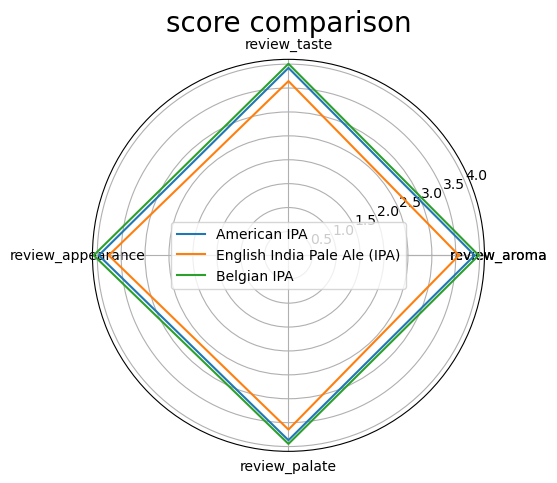

In [298]:
plt.figure(figsize=(4, 4))
plt.subplot(polar=True)
plt.plot(label_loc, American_IPA, label='American IPA')
plt.plot(label_loc, English_IPA, label="English India Pale Ale (IPA)")
plt.plot(label_loc, Belgian_IPA, label="Belgian IPA")
plt.title('score comparison', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

### seaborn : 'American IPA', 'English India Pale Ale (IPA)', 'Belgian IPA' / four various scores

In [236]:
scores_Types=df_select.melt(id_vars='beer_style', value_vars=["review_aroma", "review_taste", "review_appearance", "review_palate"],var_name='review_type')
scores_Types

,beer_style,review_type,value
0,American IPA,review_aroma,4.0
1,American IPA,review_aroma,4.0
2,American IPA,review_aroma,4.0
3,American IPA,review_aroma,4.0
4,American IPA,review_aroma,4.0
...,...,...,...
583947,American IPA,review_palate,4.0
583948,Belgian IPA,review_palate,2.0
583949,Belgian IPA,review_palate,3.0
583950,Belgian IPA,review_palate,3.0


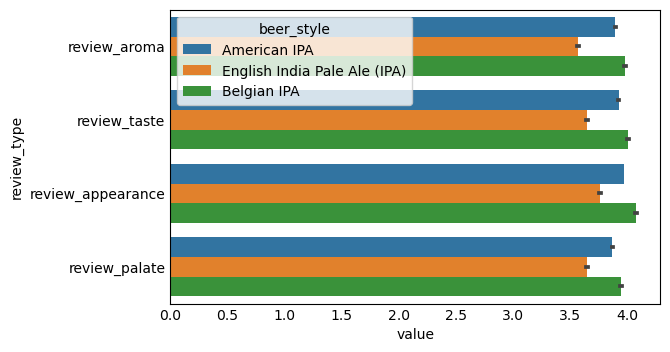

In [239]:
plt.figure(figsize=(5,3))
ax = sns.barplot(x="value", y= "review_type", data=scores_Types, hue ='beer_style')

### Seaborn plot: boxplot for the %abv per type of beer 

<AxesSubplot:xlabel='beer_abv', ylabel='beer_style'>

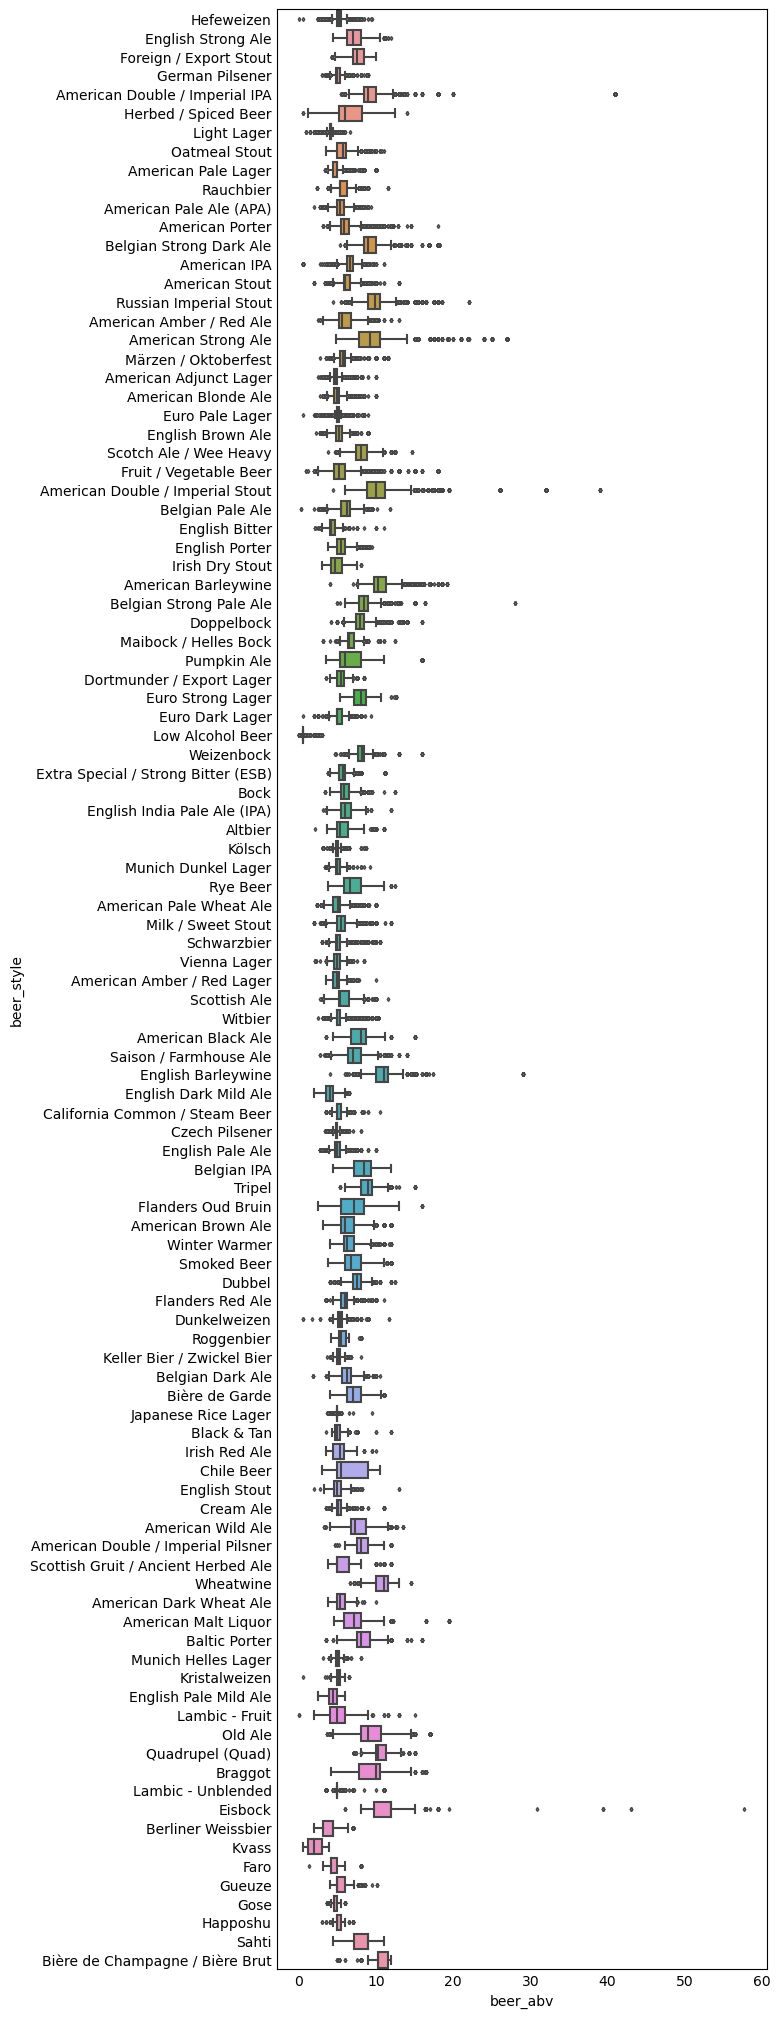

In [213]:
plt.figure(figsize=(5,20))
flierprops = dict(markerfacecolor='0.75', markersize=2,
              linestyle='none')
sns.boxplot(data=df, y="beer_style", x="beer_abv", flierprops = flierprops)

### Seaborn plot: boxplot: style of beer for abv_beer outliers 

In [304]:
outliers.head(2)

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,Outlier
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986,brewery_id
1,1,10325,Vecchio Birraio,2009-03-01 13:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213,brewery_id


In [308]:
beer_abv = outliers[outliers["Outlier"] == "beer_abv"]

<AxesSubplot:xlabel='beer_abv', ylabel='beer_style'>

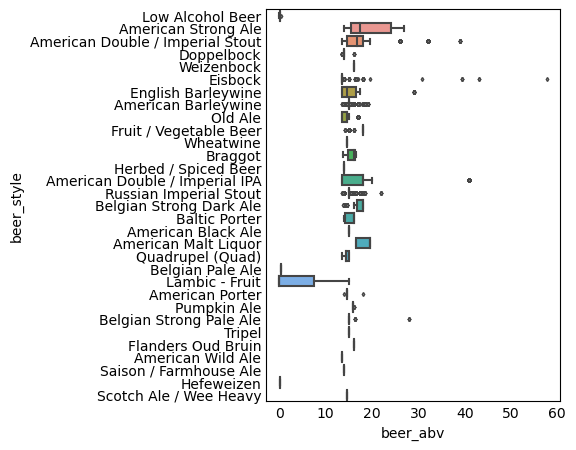

In [313]:
plt.figure(figsize=(3,4))
flierprops = dict(markerfacecolor='0.75', markersize=2,
              linestyle='none')
sns.boxplot(data = beer_abv, y="beer_style", x="beer_abv", flierprops = flierprops)

### Matplotlib: overall score _ big vs small breweries 

In [315]:
df.head(1)

,index,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,0,10325,Vecchio Birraio,2009-02-16 20:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986


In [322]:
breweries = df.groupby("brewery_name").agg({"beer_name":"count", "review_overall":"mean"}).reset_index()
breweries

,brewery_name,beer_name,review_overall
0,'t Hofbrouwerijke,37,3.702703
1,(512) Brewing Company,304,4.065789
2,10 Barrel Brewing Co.,84,3.732143
3,1516 Brewing Company,34,4.132353
4,16 Mile Brewing Company,92,3.570652
...,...,...,...
5737,Ölvisholt Brugghús,97,3.912371
5738,Öufi Brauerei,1,3.500000
5739,Ølfabrikken,586,4.069966
5740,Ørbæk Bryggeri,18,3.583333


In [325]:
breweries.sort_values(by = "beer_name", ascending = False)

,brewery_name,beer_name,review_overall
701,Boston Beer Company (Samuel Adams),39438,3.689563
1963,Dogfish Head Brewery,33829,3.836013
4950,Stone Brewing Co.,33053,4.040193
4743,Sierra Nevada Brewing Co.,28746,4.056182
413,"Bell's Brewery, Inc.",25189,3.973064
...,...,...,...
1583,Cerveceria Tesoro,1,3.000000
2598,Harmon Brewing And Tap Room,1,3.500000
1585,Cerveceros Krut S.L.,1,4.000000
4563,SP Novoteh Ltd. / Karpat Brewery,1,3.500000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


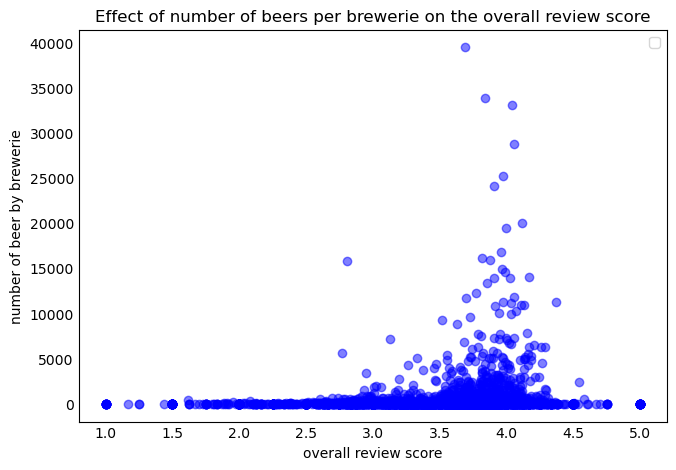

In [370]:
plt.figure(figsize=(6,4))
x = breweries["review_overall"]
y = breweries["beer_name"]
plt.scatter(x, y, c ="blue", alpha = 0.5)
plt.xlabel("overall review score")
plt.ylabel("number of beer by brewerie")
plt.title("Effect of number of beers per brewerie on the overall review score")
plt.legend()
plt.show()

In [331]:
breweries[breweries["beer_name"] > 10000]

,brewery_name,beer_name,review_overall
151,Anchor Brewing Company,10058,3.941241
163,Anheuser-Busch,15812,2.806002
235,Avery Brewing Company,16105,3.814499
413,"Bell's Brewery, Inc.",25189,3.973064
701,Boston Beer Company (Samuel Adams),39438,3.689563
1238,Brooklyn Brewery,13901,3.907273
1933,Deschutes Brewery,10879,4.133100
1963,Dogfish Head Brewery,33829,3.836013
2239,Flying Dog Brewery,11696,3.698743
2262,Founders Brewing Company,20000,4.114475


In [333]:
breweries[breweries["beer_name"] > 1000]

,brewery_name,beer_name,review_overall
10,21st Amendment Brewery,2978,3.699295
48,Abbaye de Leffe S.A.,1807,3.687327
57,Abita Brewing Co.,5357,3.558802
88,Alaskan Brewing Co.,3232,3.911665
97,AleSmith Brewing Company,6311,4.171764
...,...,...,...
5582,Widmer Brothers Brewing Company,3775,3.660000
5607,Williams Brothers Brewing Company,2340,3.730769
5659,Wychwood Brewery Company Ltd,2416,3.639487
5675,Yards Brewing Co.,2031,3.807238


In [337]:
breweries[breweries["beer_name"] < 10]

,brewery_name,beer_name,review_overall
5,1648 Brewing Company Ltd,1,3.500000
6,1702 / The Address Brewing Co.,1,4.000000
7,192 Brewing Company,3,1.833333
13,3 Cordilleras,1,4.000000
15,3 Stars Brewing Company,3,3.166667
...,...,...,...
5729,Árainn Mhór Brewing Company,6,3.500000
5732,Åsundens Bryggeri,1,4.000000
5735,Ölgerð Reykjavíkur,1,2.500000
5738,Öufi Brauerei,1,3.500000


C:\Users\Rachad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='beer_name', ylabel='Density'>

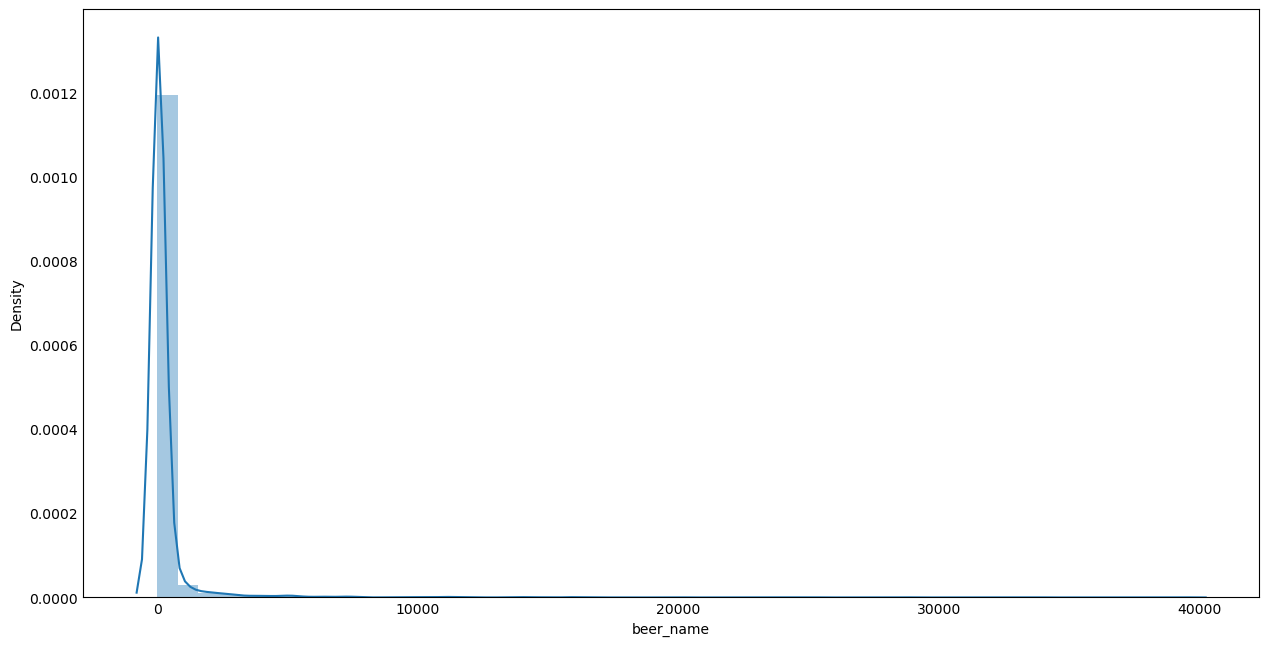

In [338]:
fig, axes = plt.subplots(1, figsize=(12, 6), sharex=True)
sns.distplot(breweries.beer_name)

In [371]:
breweries_low = breweries[breweries["beer_name"] < 10]
breweries_high = breweries[breweries["beer_name"] > 1000]
mean_low = breweries_low["review_overall"].mean()
mean_high = breweries_high["review_overall"].mean()


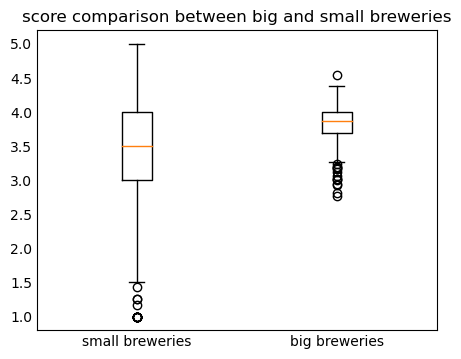

In [411]:
data1 = np.array(breweries_low["review_overall"])
data2 = np.array(breweries_high["review_overall"])
data = [data1, data2]
fig = plt.figure(figsize =(4, 3))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

# Adding title
plt.title("score comparison between big and small breweries")

# x-axis labels
ax.set_xticklabels(['small breweries', 'big breweries'])
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
 
# show plot
plt.show()